In [1]:
from pyzillow.pyzillow import ZillowWrapper,GetDeepSearchResults
from bs4 import BeautifulSoup
from xmljson import badgerfish as bf
from pprint import pprint
#import zillow
import pandas as pd
import json
import requests
import os
import numpy as np

import matplotlib.pyplot as plt

# Importing MTA w ZipCode Data

In [2]:
os.getcwd()
mta = pd.read_csv('Resources/mta_with_zip.csv')
mta.head(2)

,Unnamed: 0,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,Zip Code
0,0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,11105
1,1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,11102


### Selecting Random Subset

In [3]:
#mta = mta.sample(n=20)

# Zillow API

In [4]:
z_key = 'X1-ZWz182xklbzbpn_8xo7s'

zillow_url = 'http://www.zillow.com/webservice/GetDeepSearchResults.htm'

params = {'zws-id': z_key}

In [17]:
stops = []
routes = []
stopzipcodes = []
stop_lat = []
stop_lon = []
zpids = []
prices = []
bedrooms = []
lats = []
lons = []
usecodes = []

for index, row in mta.iterrows():
    address = row['Stop Name']
    zipcode = row['Zip Code']
        
    params = {'zws-id': z_key,
             'address': address,
             'citystatezip': zipcode}
    
    response = requests.get(zillow_url, params=params)
    
    xml_output = response.content
    
    soup = BeautifulSoup(xml_output, 'html.parser')
    
    for z in soup.find_all('zpid'):
        zpids.append(z.get_text())
        
        stops.append(address)
        stopzipcodes.append(zipcode)
        stop_lat.append(row['GTFS Latitude'])
        stop_lon.append(row['GTFS Longitude'])
        routes.append(row['Daytime Routes'])
    
    for z in soup.find_all('amount'):
        prices.append(z.get_text())
        
    for z in soup.find_all('bedrooms'):
        bedrooms.append(z.get_text())
        
    for z in soup.find_all('latitude'):
        lats.append(z.get_text())
        
    for z in soup.find_all('longitude'):
        lons.append(z.get_text())
        
    for z in soup.find_all('usecode'):
        usecodes.append(z.get_text())

### Zillow Data to Dataframe

In [19]:
print(len(zpids), len(bedrooms))

5208 2829


In [18]:
housing_results = pd.DataFrame({'zpids': zpids,
                                'home price': prices,
                                'latitude': lats,
                                'longitude': lons,
                                'hometype': usecodes,
                                'bedrooms': bedrooms,
                                'stop name': stops,
                                'stop zipcode': stopzipcodes,
                                'stop lat': stop_lat,
                                'stop lon': stop_lon,
                                'Daytime Route': routes
                               })

ValueError: arrays must all be same length

In [ ]:
housing_results

In [16]:
housing_results

,zpids,home price,latitude,longitude,hometype,stop name,stop zipcode,stop lat,stop lon,Daytime Route,distance_miles
0,31947881,1297999.0,40.780026,-73.916672,SingleFamily,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.421744
1,94721614,543865.0,40.770830,-73.903180,MultiFamily2To4,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.547056
2,94721483,687975.0,40.770830,-73.903180,MultiFamily2To4,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.547056
3,31947885,1402414.0,40.779837,-73.916406,SingleFamily,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.403068
4,31943243,1290066.0,40.768852,-73.900892,Triplex,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.723042
5,31943244,1150027.0,40.768754,-73.900791,Duplex,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.731314
6,31943245,1160859.0,40.768724,-73.900656,Triplex,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.738236
7,31943257,1134018.0,40.768739,-73.900724,Triplex,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.734753
8,31943285,1227929.0,40.769580,-73.901833,Duplex,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.653671
9,31943286,959159.0,40.769521,-73.901803,Duplex,Astoria - Ditmars Blvd,11105,40.775036,-73.912034,N W,0.657310


# Data Transformation

In [8]:
# converting some columns to float: prices, lat, lons

housing_results['home price'] = housing_results['home price'].apply(lambda x: 0 if x == '' else x)
housing_results['home price'] = housing_results['home price'].astype(float)

housing_results['latitude'] = housing_results['latitude'].astype(float)
housing_results['longitude'] = housing_results['longitude'].astype(float)

In [9]:
#housing_results.dtypes

### Creating a function to convert lat/lon to miles

* source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [10]:
from math import sin, cos, sqrt, atan2, radians

In [11]:
def convert_latlon(row):
    R = 6373.0
    
    stoplat = radians(row['stop lat'])
    stoplon = radians(row['stop lon'])
    
    homelat = radians(row['latitude'])
    homelon = radians(row['longitude'])
    
    dlon = homelon - stoplon
    dlat = homelat - stoplat
    
    a = sin(dlat / 2)**2 + cos(stoplat) * cos(homelat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance_km = R * c
    distance_m = distance_km * 0.621371
    
    return distance_m

In [12]:
housing_results['distance_miles'] = housing_results.apply(convert_latlon, axis=1)

housing_results.head()

housing_results.to_csv("Resources/housing_results.csv") 

In [13]:
housing_results = housing_results[housing_results['home price'] > 0]
housing_results = housing_results[housing_results['hometype'] != 'Unknown']

housing_results.shape

(3501, 11)

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


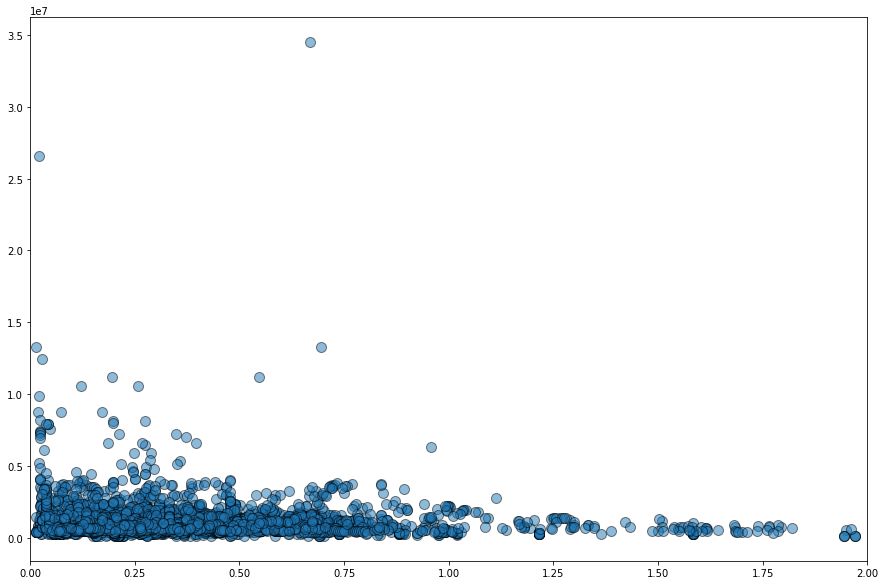

In [14]:
plt.figure(figsize=(15,10))

plt.scatter(x=housing_results['distance_miles'], y=housing_results['home price'], 
            s=100, edgecolor='black', alpha=0.5)

plt.xlim(xmin= 0, xmax=2)
#plt.yticks(np.arange(min(housing_results['home price']), max(housing_results['home price'])+1, 100.0))


plt.show()